In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from math import log
import numpy as np

In [4]:
data = pd.read_pickle("../data/processed/supply_and_demand_order_level.pkl")
data

,kingdom,phylum,class,order,nr_authors,taxonomicResearchNeeded,cropWildRelatives,horizonInvasives
0,Plantae,Tracheophyta,Magnoliopsida,Lamiales,1756.0,40.0,99.0,0.0
1,Plantae,Marchantiophyta,Jungermanniopsida,Porellales,52.0,6.0,0.0,0.0
2,Animalia,Arthropoda,Insecta,Diptera,3447.0,110.0,0.0,0.0
3,Animalia,Arthropoda,Insecta,Hemiptera,1923.0,0.0,0.0,0.0
4,Animalia,Arthropoda,Maxillopoda,Sessilia,48.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1588,Fungi,Ascomycota,Archaeorhizomycetes,Archaeorhizomycetales,0.0,0.0,0.0,0.0
1589,Animalia,Annelida,Clitellata,Capilloventrida,4.0,0.0,0.0,0.0
1590,Chromista,Cryptophyta,Cryptophyceae,NaN,0.0,0.0,0.0,0.0
1591,Animalia,Arthropoda,Trilobita,Proparia,0.0,0.0,0.0,0.0


In [5]:
plants = data[data["kingdom"]=="Plantae"]
animals = data[data["kingdom"]=="Animalia"]
fungi = data[data["kingdom"]=="Fungi"]

In [34]:
def scatter_supply_single_demand(df, demand, logarithmic=False,
                                 xmin=0, ymin=0):
    if not logarithmic:
        x = list(df["nr_authors"])
        y = list(df[demand])
    else:
        x = np.log(list(df["nr_authors"]+1))
        y = np.log(list(df["taxonomicResearchNeeded"]+1))

    fig, ax = plt.subplots()
    ax.scatter(x,y)
    
    if not logarithmic:
        ax.set_xlabel("Researchers")
        ax.set_ylabel(demand)
    else:
        ax.set_xlabel("log(Researchers + 1)")
        ax.set_ylabel("log(" + demand + " + 1)")
        
    for i, txt in enumerate(df["order"]):
        if x[i] >= xmin and y[i] >= ymin:
            ax.annotate(txt, (x[i],y[i]),
                        ha="left", rotation=30, fontsize=7)

In [39]:
a = [1, 2, 3]
b = [4, 4, 4]
a + b

[1, 2, 3, 4, 4, 4]

In [60]:
def scatter_combined_demand(df, demands, logarithmic=False,
                            xmin=0, ymin=0):
    comb_demands = len(df)*[0,]
    for demand in demands:
        norm_demand = [x/sum(df[demand]) for x in df[demand]]
        comb_demands = [comb_demands[i] + norm_demand[i] for i in range(len(comb_demands))]
    
    if not logarithmic:
        x = list(df["nr_authors"])
        y = comb_demands
    else:
        x = np.log(list(df["nr_authors"]+1))
        y = np.log([x + 1 for x in comb_demands])

    fig, ax = plt.subplots()
    ax.scatter(x,y)

    if not logarithmic:
        ax.set_xlabel("Researchers")
        ax.set_ylabel("Combined normalized demands")
    else:
        ax.set_xlabel("log(Researchers + 1)")
        ax.set_ylabel("log(combined normalized demands + 1)")

    for i, txt in enumerate(df["order"]):
        if x[i] >= xmin or y[i] >= ymin:
            ax.annotate(txt, (x[i],y[i]),
                        ha="left", rotation=30, fontsize=7)

# Plants

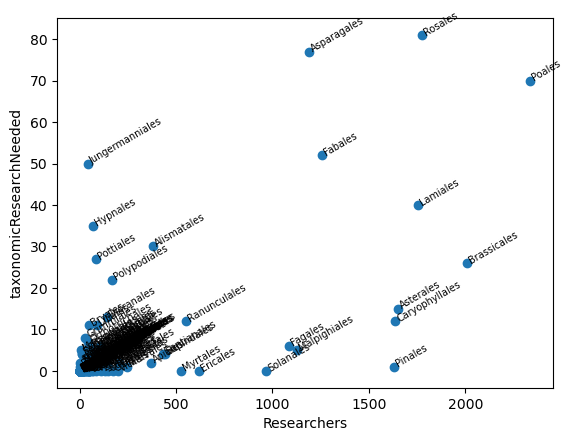

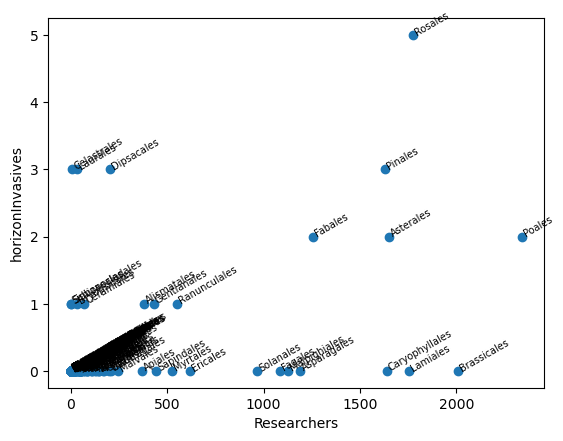

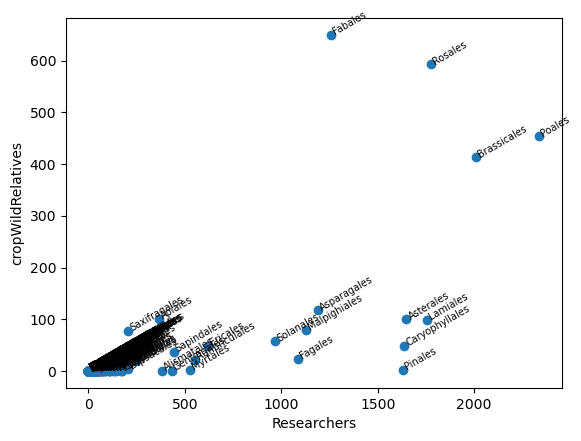

In [62]:
for demand in ["taxonomicResearchNeeded", "horizonInvasives", "cropWildRelatives"]:
    scatter_supply_single_demand(plants, demand)

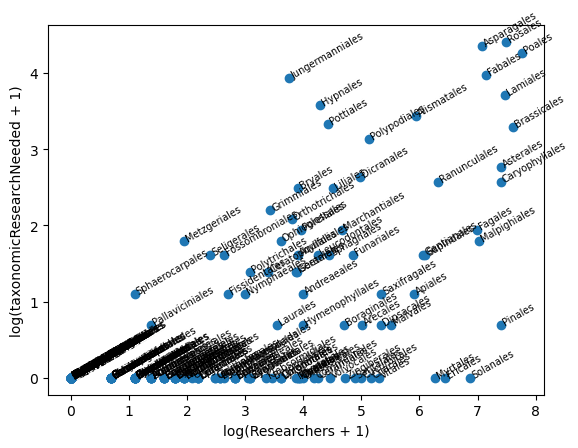

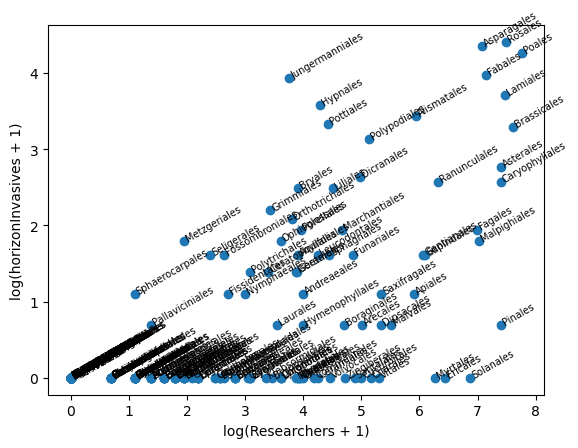

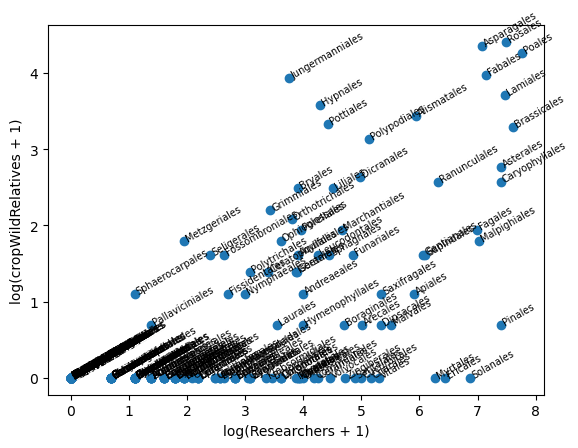

In [63]:
for demand in ["taxonomicResearchNeeded", "horizonInvasives", "cropWildRelatives"]:
    scatter_supply_single_demand(plants, demand, logarithmic=True)

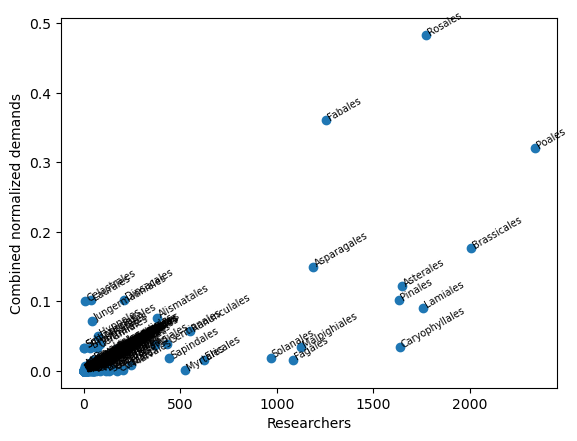

In [64]:
scatter_combined_demand(plants, ["taxonomicResearchNeeded", "horizonInvasives", "cropWildRelatives"])

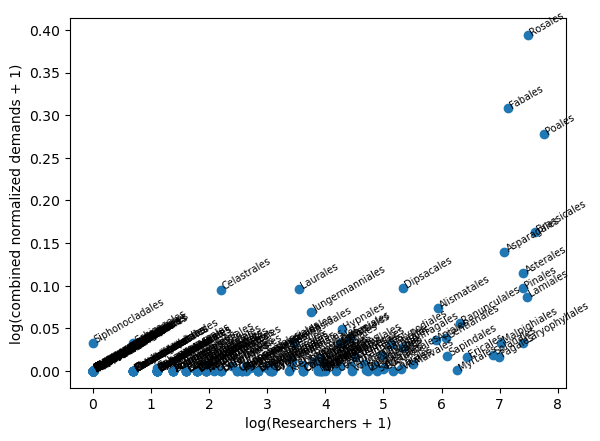

In [65]:
scatter_combined_demand(plants, ["taxonomicResearchNeeded", "horizonInvasives", "cropWildRelatives"],
                       logarithmic=True)

# Animals

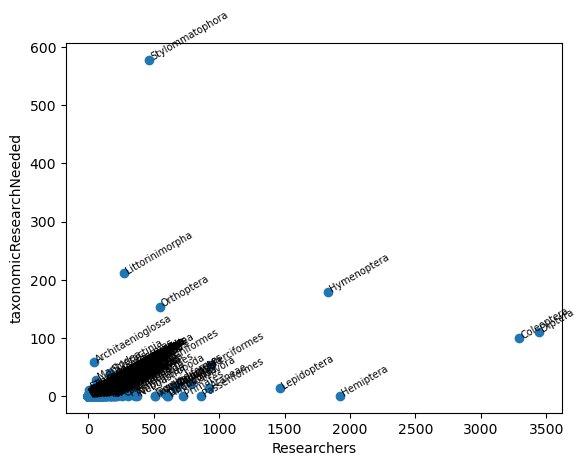

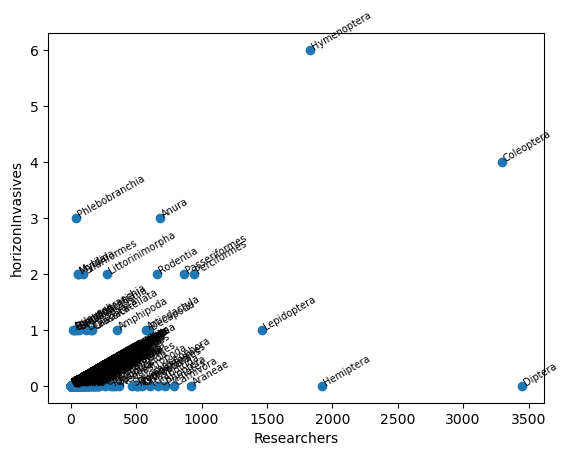

In [66]:
for demand in ["taxonomicResearchNeeded", "horizonInvasives"]:
    scatter_supply_single_demand(animals, demand)

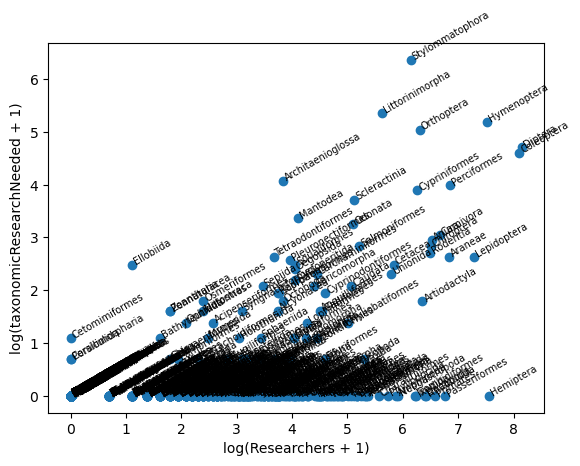

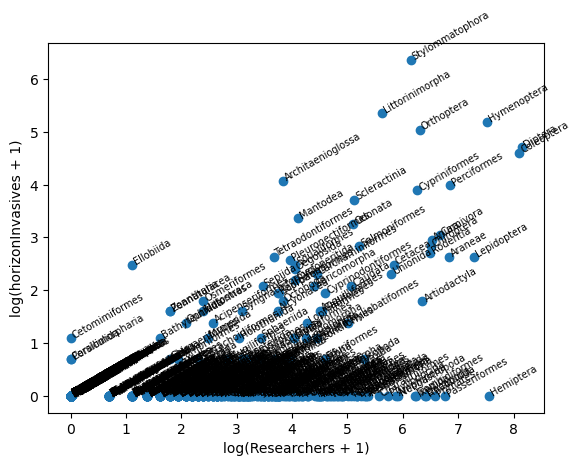

In [67]:
for demand in ["taxonomicResearchNeeded", "horizonInvasives"]:
    scatter_supply_single_demand(animals, demand, logarithmic=True)

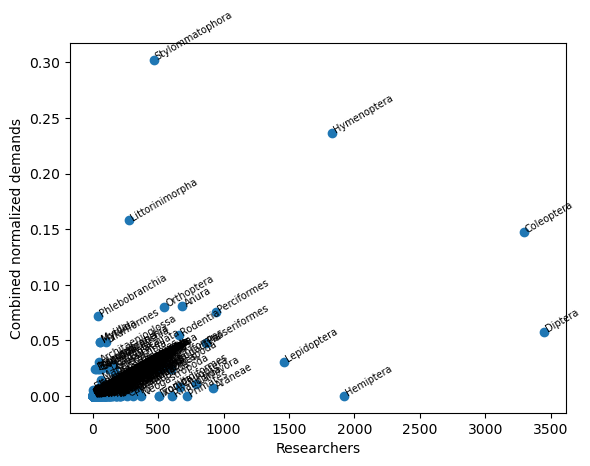

In [68]:
scatter_combined_demand(animals, ["taxonomicResearchNeeded", "horizonInvasives"])

# Fungi

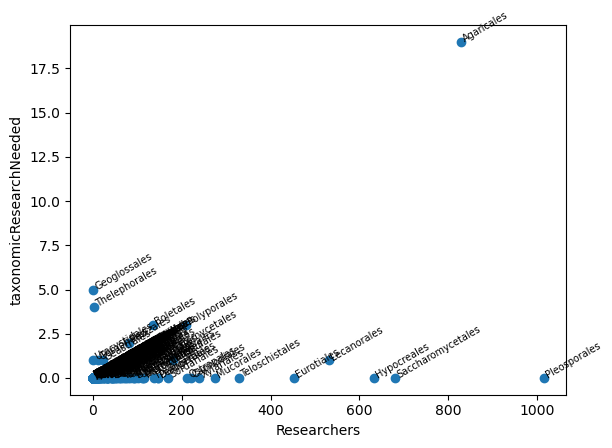

In [69]:
scatter_supply_single_demand(fungi, "taxonomicResearchNeeded")

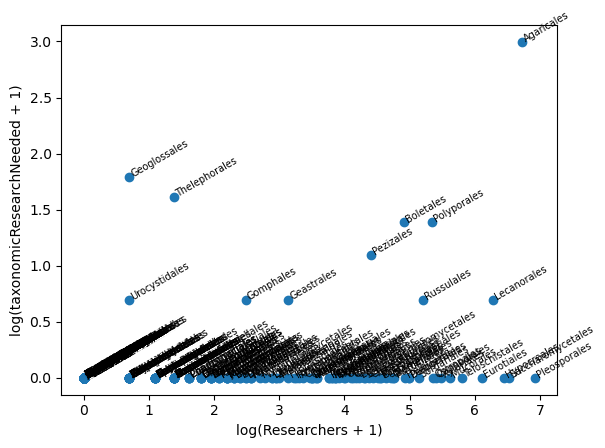

In [70]:
scatter_supply_single_demand(fungi, "taxonomicResearchNeeded", 
                             logarithmic=True)